## Part 1: Data Loading and Exploration

### Load Data & Libraries

In [5]:
# import necessary libraries
import pandas as pd
import numpy as np

In [6]:
# load CA housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Extract Features & Target Variable with Pandas

In [7]:
# create pandas dataframe for features and series for target variable (median house value). 
X = pd.DataFrame(housing.data, columns=housing.feature_names) 
y = pd.Series(housing.target, name='med_house_value')

### Data Exploration

In [27]:
# display first five rows of the dataset
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['med_house_value'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# print feature names
print(f"Feature Names: {housing.feature_names}")

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
# check for missing values
print("Missing Values:")
housing_df.isnull().sum()

Missing Values:


MedInc             0
HouseAge           0
AveRooms           0
AveBedrms          0
Population         0
AveOccup           0
Latitude           0
Longitude          0
med_house_value    0
dtype: int64

In [11]:
# generate summary statistics (mean, min, max, etc.)
print("Summary Statistics:")
housing_df.describe()

Summary Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


The initial data exploration shows that the data contains numerical features (median house age, average number of rooms, latitude/longitude, etc.) and a numerical target variable (median house value in hundreds of thousands of dollars), suggesting that a regression analysis is needed. No missing values were identified. 

## Part 2: Linear Regression on Unscaled Data

### Split the dataset into training & test sets (80/20)

In [12]:
# use sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

# split the raw data (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Train a linear regression model on the unscaled data

In [13]:
# initialize and train linear regression model on unscaled data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Make predictions on the test set

In [14]:
# make predictions on the test set
y_pred = lin_reg.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

### Evaluate Model Performance

In [15]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# mean squared error (MSE)
mse_lin = mean_squared_error(y_test, y_pred)

# root mean squared error (RMSE)
rmse_lin = root_mean_squared_error(y_test, y_pred)

# R² score
r2_lin = r2_score(y_test, y_pred)

In [16]:
# evaluate model performance
print("Unscaled Data Model:")
print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"Root Mean Squared Error: {rmse_lin:.2f}")
print(f"R² Score: {r2_lin:.2f}")

Unscaled Data Model:
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R² Score: 0.58


### Interpretation Questions

#### What does the R² score tell us about model performance?
Broadly, the R² score tells us how much of the variance in the target variable is predicted by the features used in a given regression model. A score of 1 would indicate a 'perfect' (and therefore practically unattainable) model, while a score of 0 would indicate that the model has no predictive power. In this case, the R² score of 0.58 suggests that the model has some ability to predict median house value. However, there is still a significant amount of variance in the target that is not accounted for by the chosen features.

#### Which features seem to have the strongest impact on predictions based on the model’s coefficients?


In [17]:
# view the model's coefficients
coef_series = pd.Series(lin_reg.coef_, index = X.columns)
coef_series

MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64

Based on the model's coefficients, features such as average number of bedrooms, median income, latitude, and longitude seem to have the strongest impact on predictions. The coefficients of these features have the highest absolute values, suggesting that they have a significant impact on the predicted outcome and a strong linear relationship with our target variable, median house value.

#### How well do the predicted values match the actual values?

RMSE (root mean squared error) is a useful metric for evaluating how well predicted values match actual values; in other words, how closely a predictive model aligns with the actual data, or "answer key." A lower RMSE value indicates better model performance in terms of fitting a dataset. In this case, the RMSE was 0.75, telling us that the average difference between predicted and median house value is $75,000. Given that housing prices in this dataset range from $14,000 to $500,000, this represents a fairly significant gap betwen predicted and actual values.

## Part 3: Scaled Model

In [18]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler and apply it to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# split the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, 
                                                 test_size = 0.2, random_state = 42)

# fit scaled data
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train_scaled)

# make predictions
y_pred_scaled = lin_reg_scaled.predict(X_test_scaled)
y_pred_scaled

# evaluate model performance
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
rmse_scaled = root_mean_squared_error(y_test_scaled, y_pred_scaled)

print("\nScaled Data Model:")
print(f"Mean Squared Error: {mse_scaled:.2f}")
print(f"Root Mean Squared Error: {rmse_scaled:.2f}")
print(f"R² Score: {r2_scaled:.2f}")
print("Model Coefficients (Scaled):")
print(pd.Series(lin_reg_scaled.coef_, index=X_scaled.columns))


Scaled Data Model:
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R² Score: 0.58
Model Coefficients (Scaled):
MedInc        0.852382
HouseAge      0.122382
AveRooms     -0.305116
AveBedrms     0.371132
Population   -0.002298
AveOccup     -0.036624
Latitude     -0.896635
Longitude    -0.868927
dtype: float64


### Interpretation Questions

#### Compare the metrics before and after scaling. What changed, and why?


#### Did the R² score improve? Why or why not?

#### What role does feature scaling play in linear regression?

## Part 4: Feature Selection and Simplified Model

### Select three features from the dataset to build a simplified model. Explain your choice.
The three features with the highest absolute values for their coefficients are AveBedrms, MedInc, and Longitude. However, AveBedrms appears to be a slightly strange metric, in that the summary statistics indicate that there may be a few outliers in this dataset. The maximum value is over 30, much more extreme than most of the other values. Additionally, Longitude would not seem to be as relevant of a feature without also considering Latitude. As a result, I choose to build the simplified model with the following three features:
- Median Income (MedInc)
- Latitude
- Longitude

### Train a new linear regression model using only these three features.

In [19]:
# create pandas dataframe for only these 3 features
X_simplified = X[["MedInc","Latitude","Longitude"]]
y_simplified = y

In [20]:
# split the raw data (80% training, 20% testing)
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(X_simplified, y_simplified,
                                                    test_size=0.2,
                                                    random_state=42)

# initialize and train simplified linear regression model on unscaled data
lin_reg_simplified = LinearRegression()
lin_reg_simplified.fit(X_train_simplified, y_train_simplified)

LinearRegression()

### Evaluate the performance of this simplified model and compare it to the full model.

In [21]:
# make predictions on the test set
y_pred_simplified = lin_reg_simplified.predict(X_test_simplified)
y_pred_simplified

array([0.77495362, 1.75644052, 2.30112203, ..., 4.46539019, 1.21157787,
       2.03626187])

In [22]:
# mean squared error (MSE)
mse_lin_simp = mean_squared_error(y_test_simplified, y_pred_simplified)

# root mean squared error (RMSE)
rmse_lin_simp = root_mean_squared_error(y_test_simplified, y_pred_simplified)

# R² score
r2_lin_simp = r2_score(y_test_simplified, y_pred_simplified)

In [23]:
# evaluate simplified model performance
print("Simplified Data Model:")
print(f"Mean Squared Error: {mse_lin_simp:.2f}")
print(f"Root Mean Squared Error: {rmse_lin_simp:.2f}")
print(f"R² Score: {r2_lin_simp:.2f}")

Simplified Data Model:
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R² Score: 0.57


In [24]:
# view the simplified model's coefficients
coef_series_simp = pd.Series(lin_reg_simplified.coef_, index = X_simplified.columns)
coef_series_simp

MedInc       0.368924
Latitude    -0.483077
Longitude   -0.496520
dtype: float64

### Interpretation Questions

#### How does the simplified model compare to the full model?
The simplified model shows very similar performance to the full model; whereas the full model produced an R² Score of 0.58, the simplified model's score is 0.57. This indicates that these 3 features alone have nearly the same predictive power as all 8 features considered originally. Similarly, the RMSE values for both the full and simplified model are exactly the same; for both models, the predicted and actual value vary by $75,000 on average.

#### Would you use this simplified model in practice? Why or why not?

This simplified model is still not hugely predictive; the R² Score and RMSE show that the model can predict median housing value to an extent, but there is quite a bit of variance remaining. However, the use of simplified models could certainly still be useful. Limiting the model to just 3 features makes it easier to interpret the predictions and also means that less data is required to make future predictions. As long as the limitations of this simplified model are acknowledged, I would consider using it in practice. 

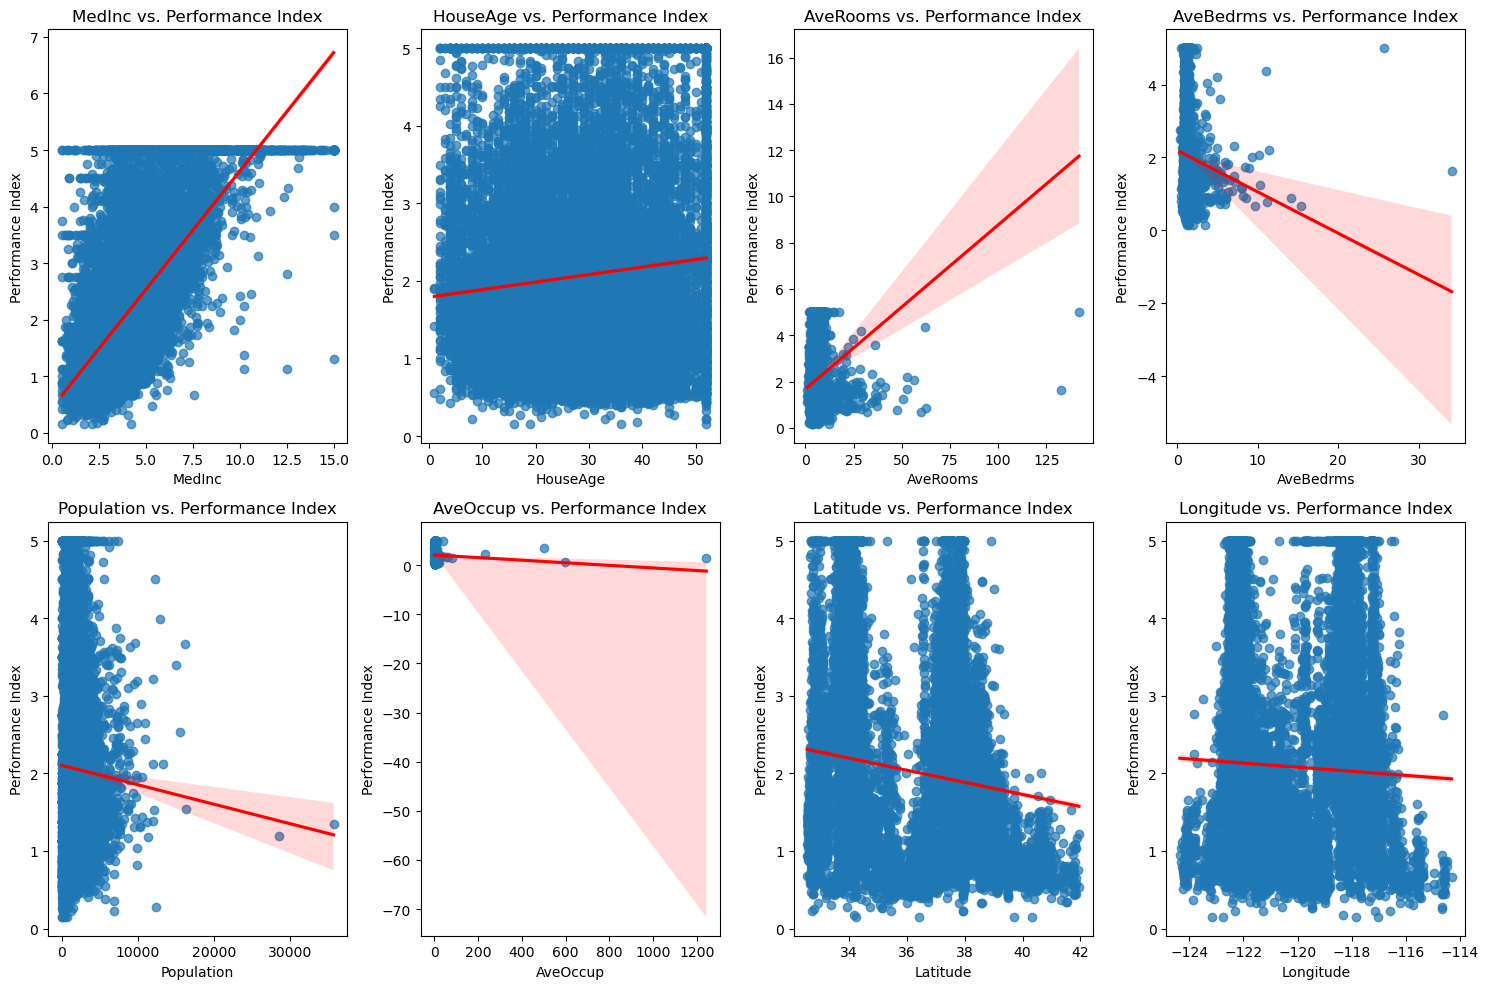

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(housing.feature_names):
    plt.subplot(2, 4, i + 1)
    sns.regplot(x=X[col],
                y=y,
                scatter_kws={'alpha': 0.7},
                line_kws={'color': 'red'})
    plt.title(f"{col} vs. Performance Index")
    plt.xlabel(col)
    plt.ylabel("Performance Index")
plt.tight_layout()
plt.show()